# Global Electric Vehicle Usage from 2010 to 2023

## Background
_Research Question: Which countries and continents have the highest usage of Electric Vehicles and has there been an increase in uptake and infrastructure in recent years (2010 – 2023)?_
The increasing focus on Climate Change over the past two decades has led to a rise in seeking environmentally friendly alternatives. One of the biggest areas of focus was on automobiles due to the high dependency on these for private and public travel and the high level of pollution caused as a result of this. As such there has been a larger appetite for Electric Vehicles (EV) as a solution. However, has there been a definitive increase in the use of this in recent years, or has the uptake been slow? Are some areas more enthusiastic in actualising this solution than others and is there the infrastructure to support this?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
dtf = pd.read_csv("../data/IEA Global EV Data 2024.csv")

## Dataset and Exploratory Data Analysis
After importing the dataset, call the head of the data to get a small snapshot and an understanding of the column names and their types with dtypes. The isnull will ensure there are no missing values, and summarises the data. There are 12654 rows and 8 columns. 

In [3]:
dtf.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [4]:
print(dtf.dtypes)
print(dtf.shape)

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object
(12654, 8)


In [5]:
print(dtf.isnull())
print(dtf.info())

       region  category  parameter   mode  powertrain   year   unit  value
0       False     False      False  False       False  False  False  False
1       False     False      False  False       False  False  False  False
2       False     False      False  False       False  False  False  False
3       False     False      False  False       False  False  False  False
4       False     False      False  False       False  False  False  False
...       ...       ...        ...    ...         ...    ...    ...    ...
12649   False     False      False  False       False  False  False  False
12650   False     False      False  False       False  False  False  False
12651   False     False      False  False       False  False  False  False
12652   False     False      False  False       False  False  False  False
12653   False     False      False  False       False  False  False  False

[12654 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 1265

In [6]:
unique_region = dtf['region'].unique()
print(unique_region)
print(len(unique_region))

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
54


In [7]:
print(dtf['year'].unique())
print(dtf['unit'].unique())
print(dtf['category'].unique())

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2010
 2025 2030 2035]
['percent' 'Vehicles' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']
['Historical' 'Projection-STEPS' 'Projection-APS']


The analysis I want to run is based on actual data. As the category type shows the dataset contains projection data also, this will need to be dropped. The Unit also shows additional variables than Vehicles such as charging points, so again the data will be filtered to show only vehicles. This means the vehicle variable will show actual data based around electric vehicles, compromising of 5078 rows of data. This is then plotted to show the different types electric vehicles and their %s within the dataset.

In [8]:
historical = dtf[dtf['category'] == 'Historical']
print(historical.shape)

(9174, 8)


In [9]:
vehicle = historical[historical['unit'] == 'Vehicles']
print(vehicle.shape)

(5078, 8)


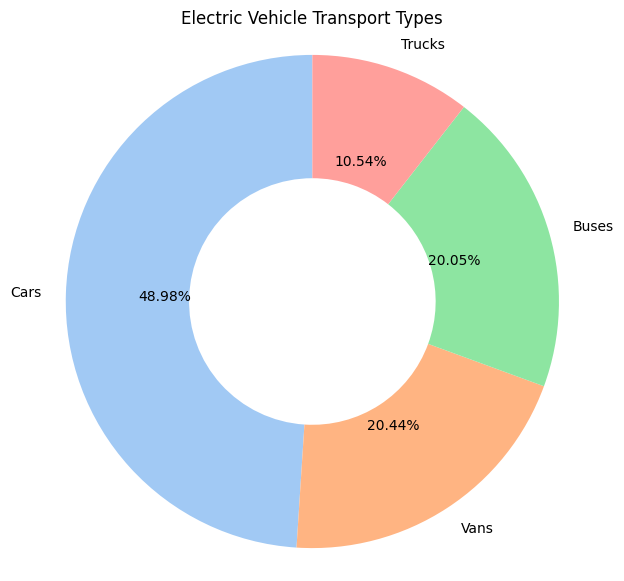

In [10]:
modes = vehicle['mode'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(modes,
        startangle = 90,
        labels = modes.index,
        autopct = '%1.2f%%',
        wedgeprops = {'width': 0.5},
        colors = sns.color_palette("pastel"))
plt.title('Electric Vehicle Transport Types')
plt.axis('equal')
plt.show()

## Vehicle Country Data
Now it is time to Group the vehicles together by their region, and sum the values and cast it back as a DataFrame so that we can analyse and visualise the top countries. We will drop "World" and this will be used for Global analysis later.

In [11]:
vehicle_groups = vehicle.groupby('region')['value'].sum()
country_ev = pd.DataFrame(vehicle_groups).reset_index()
country_ev.columns = ['country', 'total value']
country_ev = country_ev[country_ev['country'] != 'World']
print (country_ev)

                 country   total value
0              Australia  5.788320e+05
1                Austria  8.719660e+05
2                Belgium  1.687010e+06
3                 Brazil  2.649470e+05
4               Bulgaria  4.623000e+03
5                 Canada  2.416440e+06
6                  Chile  1.445800e+04
7                  China  8.733635e+07
8               Colombia  1.602300e+04
9             Costa Rica  2.763100e+04
10               Croatia  7.557000e+03
11                Cyprus  2.260000e+03
12        Czech Republic  3.430000e+04
13               Denmark  1.102561e+06
14                  EU27  3.324256e+07
15               Estonia  4.585000e+03
16                Europe  4.658255e+07
17               Finland  7.427230e+05
18                France  6.787772e+06
19               Germany  1.020111e+07
20                Greece  1.053560e+05
21               Hungary  4.203500e+04
22               Iceland  1.897660e+05
23                 India  5.193750e+05
24               Ireland 

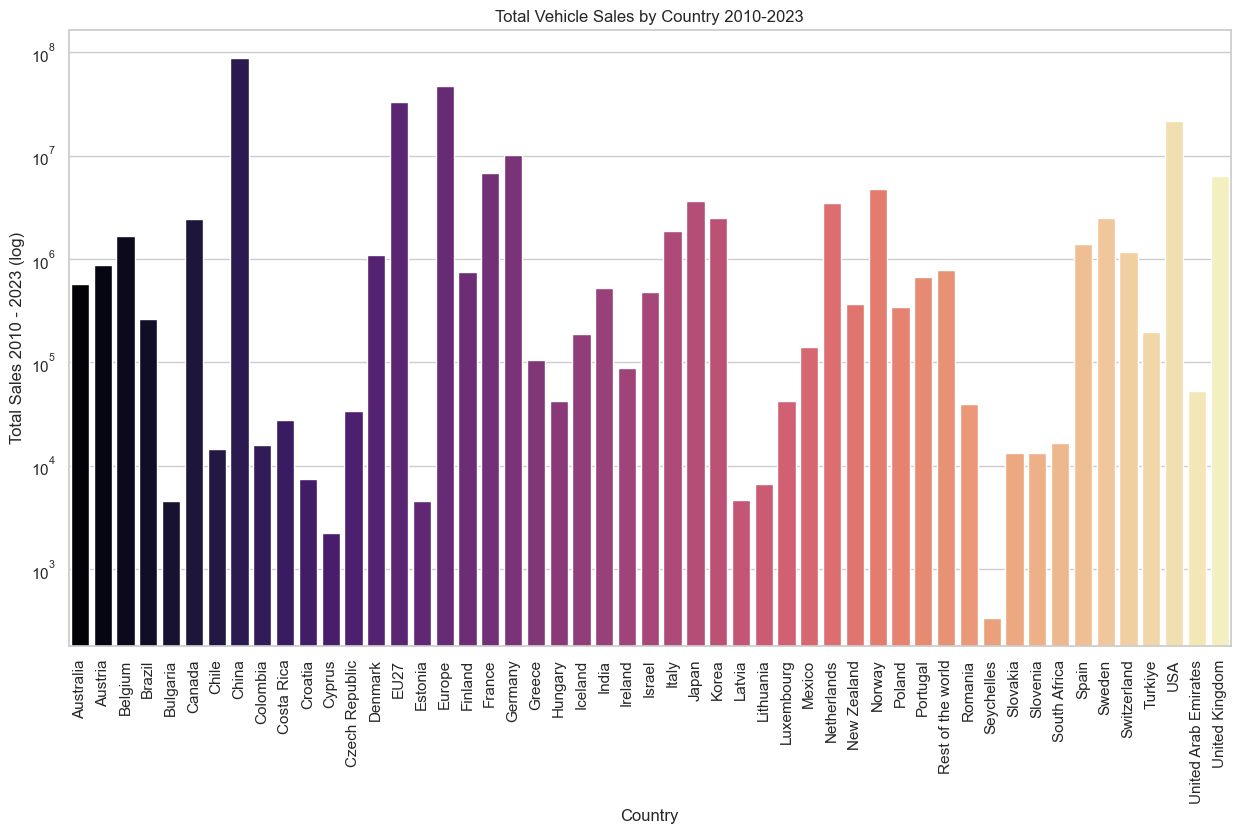

In [12]:
sns.set(style = "whitegrid")
plt.figure(figsize = (15, 8))
sns.barplot(country_ev, x = 'country', y = 'total value', hue = 'country', palette = 'magma')
plt.title('Total Vehicle Sales by Country 2010-2023')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales 2010 - 2023 (log)')
plt.yscale('log')
plt.show()

This graph does a great job, but as a log scale is needed to ensure we can clearly capture everything, it is hard to understand the disparity. By turning this into a % of all sales, it is easier to see the country differences. 

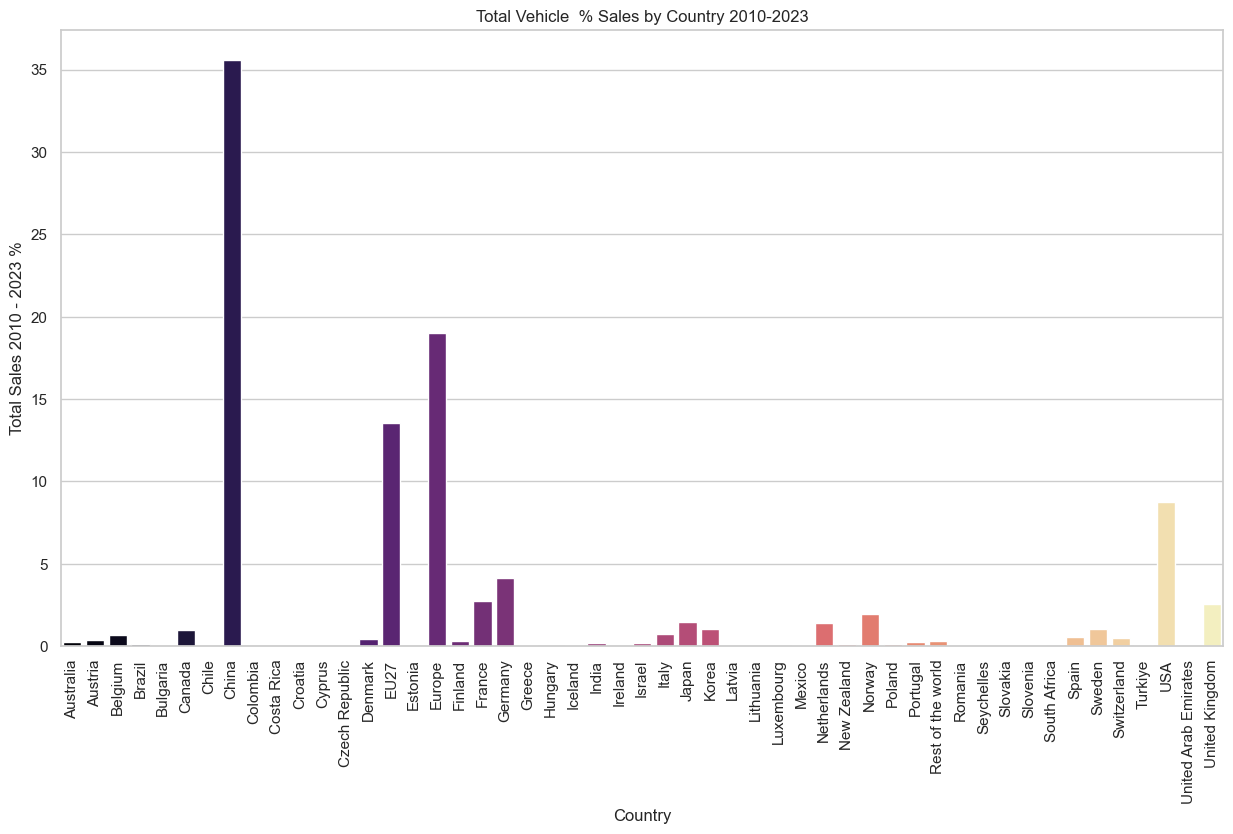

In [13]:
total_sum = country_ev['total value'].sum()
country_ev['Percentage'] = (country_ev['total value'] / total_sum) * 100

sns.set(style = "whitegrid")
plt.figure(figsize = (15, 8))
sns.barplot(country_ev, y = 'Percentage', x = 'country', hue = 'country', palette = 'magma')
plt.title('Total Vehicle  % Sales by Country 2010-2023')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales 2010 - 2023 %')
plt.show()

In [14]:
top_countries = country_ev.sort_values('total value', ascending = False).head(10)
top_countries = pd.DataFrame(top_countries).reset_index(drop=True)
top_countries.index +=1
print(top_countries)

           country  total value  Percentage
1            China   87336346.0   35.619227
2           Europe   46582549.0   18.998212
3             EU27   33242559.0   13.557635
4              USA   21509187.2    8.772300
5          Germany   10201107.0    4.160416
6           France    6787772.0    2.768323
7   United Kingdom    6283637.0    2.562716
8           Norway    4793634.0    1.955034
9            Japan    3603756.0    1.469755
10     Netherlands    3488004.4    1.422547


Creating this variable reduces the noise created with a high number of unique countries within the column. The real % figures are a great statistic for anybody to easily understand. To further answer the question, let's take this Top 10 variable and visualise the sales figures for these.

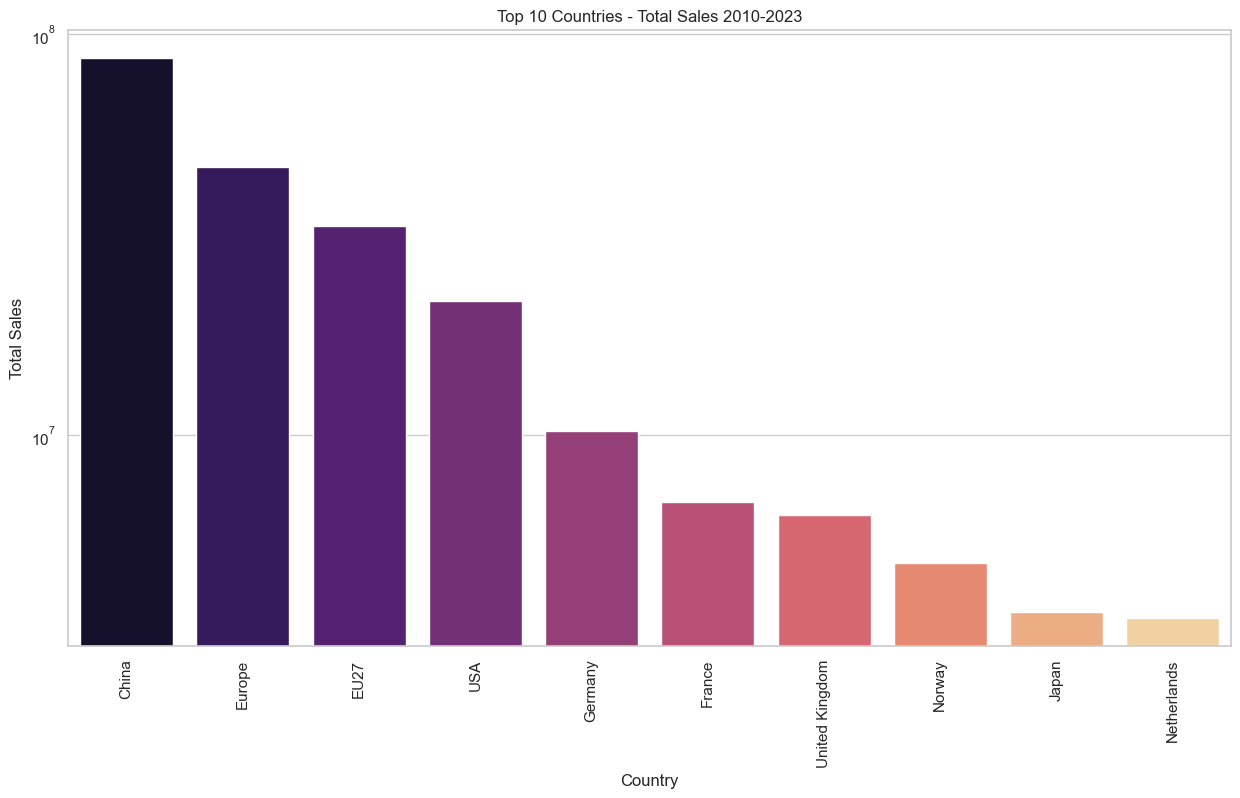

In [15]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (15, 8))
sns.barplot(top_countries, x = 'country', y = 'total value', hue = 'country', palette = 'magma')
plt.title('Top 10 Countries - Total Sales 2010-2023')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales')
plt.yscale('log')
plt.show()

## Global Vehicle Sales Data
We can use the World Data that was previously dropped to answer the next part of the question of an uptake in recent years. This trend can be plotted using a line graph and shows a clear upward trend likely to continue as the years carry on. 

In [16]:
world = vehicle[vehicle['region'] == 'World']
print(world.shape)

(298, 8)


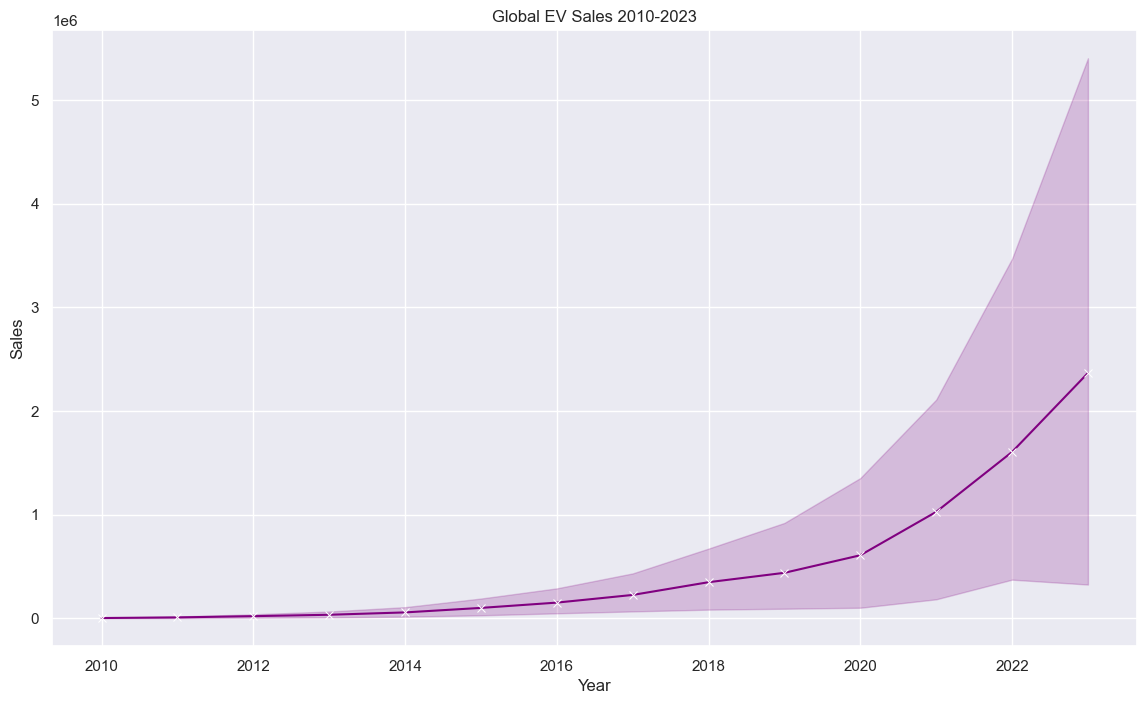

In [17]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (14, 8))
sns.lineplot(data = world,
             x = 'year',
             y = 'value',
             color = 'purple',
             marker = 'x')
plt.title('Global EV Sales 2010-2023')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

## Infrastructure - Country Analysis
The final part of this question is understanding the role of infrastructure. The dataset also contains Charging Points, and this can be used to create similar analysis to that performed on the vehicles. Starting in the same fashion, let's explore the top countries for Charging Points.

In [18]:
charging = historical[historical['unit'] == 'charging points']
print(charging.shape)
print(charging['region'].unique())

(750, 8)
['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Africa'
 'Spain' 'Sweden' 'Switzerland' 'Thailand' 'Turkiye' 'United Kingdom'
 'USA' 'World']


In [19]:
charge_groups = charging.groupby('region')['value'].sum()
country_char = pd.DataFrame(charge_groups).reset_index()
country_char.columns = ['country', 'total value']
country_char = country_char[country_char['country'] != 'World']
print (country_char)

           country   total value
0        Australia  1.286100e+04
1          Austria  4.360200e+04
2          Belgium  1.044690e+05
3           Brazil  8.275400e+03
4           Canada  1.106770e+05
5            Chile  2.928000e+03
6            China  7.643000e+06
7          Denmark  6.445900e+04
8             EU27  2.030255e+06
9           Europe  2.515464e+06
10         Finland  3.824300e+04
11          France  4.010990e+05
12         Germany  3.748850e+05
13          Greece  9.851000e+03
14         Iceland  4.252000e+03
15           India  2.407700e+04
16       Indonesia  1.705000e+03
17          Israel  7.681200e+03
18           Italy  1.448770e+05
19           Japan  2.717100e+05
20           Korea  6.427200e+05
21          Mexico  9.935000e+03
22     Netherlands  6.085120e+05
23     New Zealand  3.659000e+03
24          Norway  1.544320e+05
25          Poland  1.925400e+04
26        Portugal  3.465000e+04
27    South Africa  1.805000e+03
28           Spain  7.689100e+04
29        

In [20]:
top_charge = country_char.sort_values('total value', ascending = False).head(10)
top_charge = pd.DataFrame(top_charge).reset_index(drop=True)
top_charge.index+=1
print(top_charge)

           country  total value
1            China    7643000.0
2           Europe    2515464.0
3             EU27    2030255.1
4              USA     819580.0
5            Korea     642720.0
6      Netherlands     608512.0
7           France     401099.0
8          Germany     374885.0
9            Japan     271710.0
10  United Kingdom     228516.0


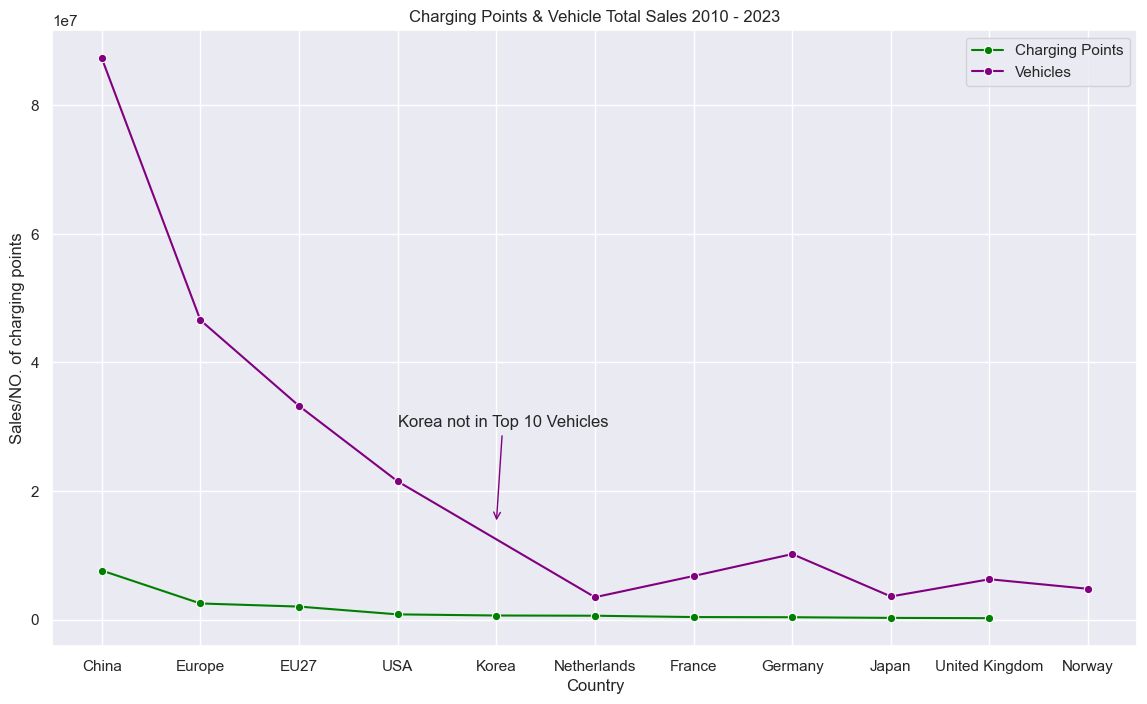

In [21]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (14, 8))
sns.lineplot(data = top_charge,
             x = 'country',
             y = 'total value',
             label = 'Charging Points',
             color = 'green',
             marker = 'o')
sns.lineplot(data = top_countries,
             x = 'country',
             y = 'total value',
             label = 'Vehicles',
             color = 'purple',
             marker = 'o')
plt.title('Charging Points & Vehicle Total Sales 2010 - 2023')
plt.xlabel('Country')
plt.ylabel('Sales/NO. of charging points')
plt.legend(loc='upper right')
plt.annotate('Korea not in Top 10 Vehicles',
             xy = ('Korea', 1.5e7),
             xytext = ('USA', 3e7),
             arrowprops=dict(color = 'purple', arrowstyle = '->'))
plt.show()

The graph shows some interesting disparity between the two datasets, with Norway appearing in the top 10 vehicle sales, but not the top 10 charging point sales, and Korea favouring a higher number of charging points but a smaller amount of vehicle sales. Whilst China is still leading in both categories, there is a significant gap between their vehicle sales and charging point sales. Netherlands and Japan have the closes parity of sales in the combined Top 10.

## Global Infrastructure Sales
Continuing with our theme, it's time to turn the attention to the Global sales of charging points and then overlay this with the global vehicle sales. 

In [22]:
world_char = charging[charging['region'] == 'World']
print(world_char.shape)

(28, 8)


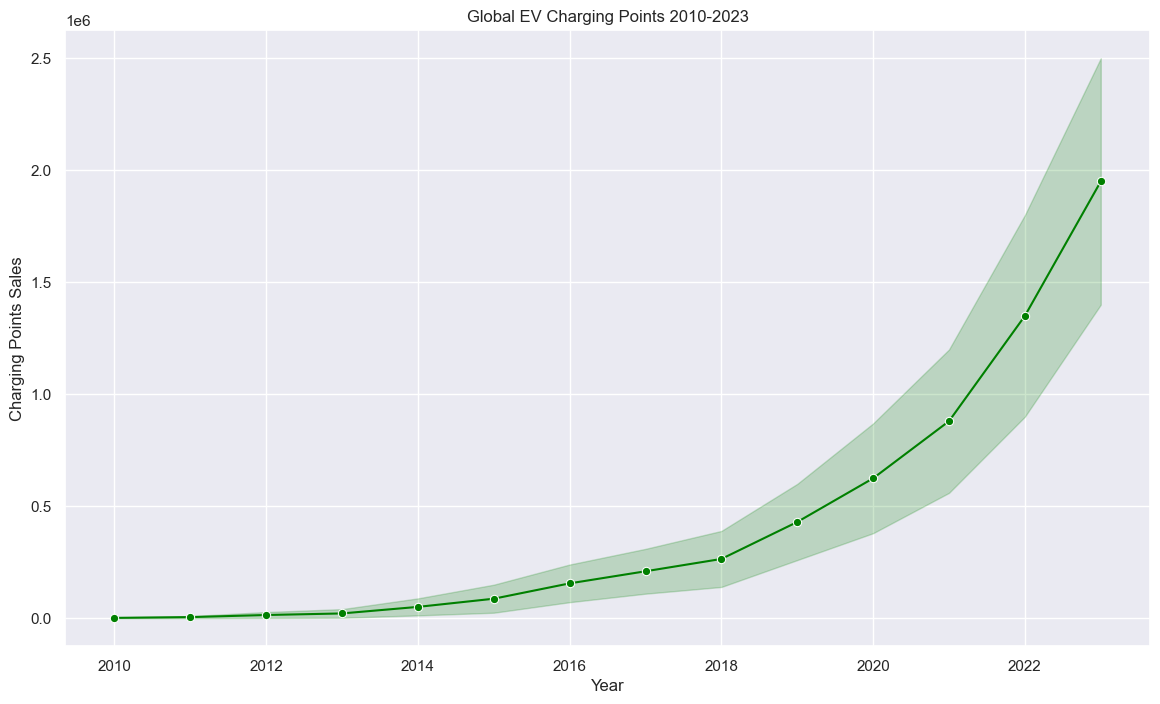

In [23]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (14, 8))
sns.lineplot(data = world_char,
             x = 'year',
             y = 'value',
             color = 'green',
             marker = 'o')
plt.title('Global EV Charging Points 2010-2023')
plt.xlabel('Year')
plt.ylabel('Charging Points Sales')
plt.show()

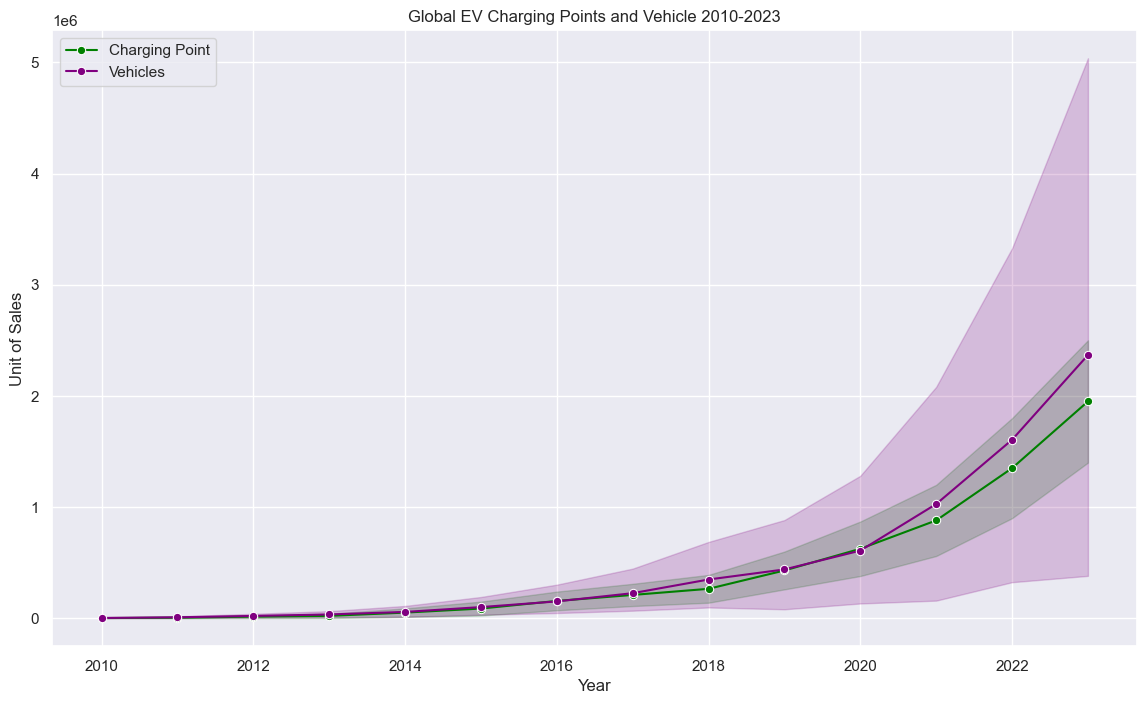

In [24]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (14, 8))
sns.lineplot(data = world_char,
             x = 'year',
             y = 'value',
             label = 'Charging Point',
             color = 'green',
             marker = 'o')
sns.lineplot(data = world,
             x = 'year',
             y = 'value',
             label = 'Vehicles',
             color = 'purple',
             marker = 'o')
plt.title('Global EV Charging Points and Vehicle 2010-2023')
plt.xlabel('Year')
plt.ylabel('Unit of Sales')
plt.legend(loc = 'upper left')
plt.show()

An interesting set of results displaying a correlation between the two sales and that the vehicle sales are growing at a higher rate than the charging points, with greater potential for fluctuation. To statistically analyse this, new variables will be needed to create dataframes that align to the chart readings: to group by year instead of region and sum the values, and reset as dataframes, check the changes of these. The columns will be renamed to ensure they are distinct from eachother and then the two datasets can be merged as an inner join on the year. As they are the same, there are no concerns, but as the analyse requires both columns to be present (vehicles and charging points) an inner join is best as it will only return data when they match in both datasets. 

In [25]:
world_merge = world.groupby('year')['value'].sum()
world_set = pd.DataFrame(world_merge).reset_index()
world_set.columns = ['year', 'value']
print(world_set)

    year       value
0   2010     47685.0
1   2011    144087.0
2   2012    358786.0
3   2013    655419.0
4   2014   1143475.0
5   2015   2113431.0
6   2016   3338572.0
7   2017   5192033.0
8   2018   8368933.0
9   2019  10542285.0
10  2020  14605501.0
11  2021  24653554.0
12  2022  38528610.0
13  2023  56809860.0


In [26]:
char_merge = world_char.groupby('year')['value'].sum()
char_set = pd.DataFrame(char_merge).reset_index()
char_set.columns = ['year', 'value']
print(char_set)

    year      value
0   2010     4010.0
1   2011    10830.0
2   2012    29500.0
3   2013    43600.0
4   2014   102000.0
5   2015   175000.0
6   2016   312000.0
7   2017   420000.0
8   2018   530000.0
9   2019   860000.0
10  2020  1250000.0
11  2021  1760000.0
12  2022  2700000.0
13  2023  3900000.0


In [27]:
world_rename = world_set.rename(columns={'value': 'vehicle'})
char_rename = char_set.rename(columns={'value': 'charge'})
merged_ev = pd.merge(world_rename, char_rename, on= 'year', how= 'inner')
print(merged_ev)

    year     vehicle     charge
0   2010     47685.0     4010.0
1   2011    144087.0    10830.0
2   2012    358786.0    29500.0
3   2013    655419.0    43600.0
4   2014   1143475.0   102000.0
5   2015   2113431.0   175000.0
6   2016   3338572.0   312000.0
7   2017   5192033.0   420000.0
8   2018   8368933.0   530000.0
9   2019  10542285.0   860000.0
10  2020  14605501.0  1250000.0
11  2021  24653554.0  1760000.0
12  2022  38528610.0  2700000.0
13  2023  56809860.0  3900000.0


In [28]:
corr_coef, p_value = pearsonr(merged_ev['vehicle'], merged_ev['charge'])

print("Correlation coefficient ", corr_coef)
print("P-value ", p_value)

Correlation coefficient  0.9980711520923982
P-value  7.404302896744498e-16


The coefficient calculation displays how cloesly linked Vehicle and Charging Point Sales are, with a maximum of 1. This proves what is to be perceived in the graph. The P-Value demonstrates the stastical significance of this, with 0.05 or below being an industry standard threshold. e-16 means there are a lot of "0" after the decimal place, demonstrating it is highly significant and that this correlation was not down to random chance. 

## Conclusion
There is a definitive rise in Global Electric Vehicle Sales, indicating that this trend will continue. Charging Point sales are also on the rise, but there is potential for further disparity between these and vehicle sales, so a stronger focus on Charging Points may be required in future years to support the expontential increase of EV sales. China currently leads the market with over 35.6% of EV Sales. 